使用Dataset為 Online Shoppers Purchasing Intention Dataset

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset


預測顧客是否有購買商品

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus
import os
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [3]:
df = pd.read_csv('./online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

不需做遺漏值填補

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
df.loc[df['Revenue']==True, 'Revenue'] = 1
df.loc[df['Revenue']==False, 'Revenue'] = 0
df.loc[df['Weekend']==True, 'Weekend'] = 1
df.loc[df['Weekend']==False, 'Weekend'] = 0

In [8]:
df.loc[df['VisitorType']=='Returning_Visitor', 'VisitorType'] = 0
df.loc[df['VisitorType']=='New_Visitor', 'VisitorType'] = 1
df.loc[df['VisitorType']=='Other', 'VisitorType'] = 2

In [10]:
df[df['Revenue'] == 1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.0
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488,0.237945,0.261530,1.0
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,0.929779,1.897042,2.407173,3.987140,0.445200,0.439583,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.0
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.0
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,2.000000,2.000000,4.000000,4.000000,0.000000,1.000000,1.0
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.0


In [11]:
df = df.drop('Month',axis = 1)

In [12]:
df_test = df[:6165]

In [13]:
df_train = df[6165:]

In [14]:
y = df_train['Revenue'].values
df_train = df_train.drop('Revenue', 1)
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
os.environ['PATH'] = os.environ['PATH'] + (';C:\\Program Files (x86)\\Graphviz2.38\\bin')

In [16]:
dtree=DecisionTreeClassifier(max_depth=4,min_samples_split=10)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['NotRevenue','Revenue'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

![](https://i.imgur.com/Dvbhglw.png)

若用決策樹做分類可得

當PageValue大於0.708有較高的機率會購買商品

但若BounceRates大於0且ExitRates大於0.019則購買的機率會降低

而PageValue小於0.708基本上購買機率極低


In [17]:
dtree.feature_importances_

array([0.00990725, 0.01877843, 0.00239506, 0.00216118, 0.0173724 ,
       0.00442703, 0.06297627, 0.01564458, 0.84687878, 0.        ,
       0.        , 0.00217701, 0.0132422 , 0.        , 0.00403981,
       0.        ])

In [18]:
y_test = df_test['Revenue'].values
X_test = df_test.drop('Revenue', 1)

y_predict = dtree.predict(X_test)

y_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9274939172749391

In [20]:
def get_splits(data):
    np.random.seed(42)
    random.seed(42)
    train, test = model_selection.train_test_split(data)
    x_train = train.loc[:, train.columns != 'Revenue']
    y_train = train['Revenue']
    x_test = test.loc[:, test.columns != 'Revenue']
    y_test = test['Revenue']
    return x_train, y_train, x_test, y_test

In [21]:
def plot_feature(data, feature_name):
    plt.figure(figsize=(10, 3))
    plt.scatter(data[feature_name], data['Revenue'])
    plt.xlabel(feature_name)
    plt.ylabel('Revenue')
    plt.show()

In [22]:
x_train, y_train, x_test, y_test = get_splits(df)
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [23]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [24]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,1,0


In [25]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=16,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
# train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test,y_test), class_weight="balance")

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

Instructions for updating:
Use tf.cast instead.
Train on 9247 samples, validate on 3083 samples
Epoch 1/10
9247/9247 [==============================] - ETA: 1:48 - loss: 0.7887 - acc: 0.218 - ETA: 3s - loss: 0.4727 - acc: 0.8152  - ETA: 1s - loss: 0.4312 - acc: 0.830 - ETA: 1s - loss: 0.4174 - acc: 0.834 - ETA: 0s - loss: 0.4056 - acc: 0.838 - ETA: 0s - loss: 0.3940 - acc: 0.842 - ETA: 0s - loss: 0.3844 - acc: 0.848 - ETA: 0s - loss: 0.3768 - acc: 0.853 - ETA: 0s - loss: 0.3710 - acc: 0.856 - ETA: 0s - loss: 0.3627 - acc: 0.859 - 1s 103us/step - loss: 0.3610 - acc: 0.8607 - val_loss: 0.3071 - val_acc: 0.8852
Epoch 2/10
9247/9247 [==============================] - ETA: 0s - loss: 0.4014 - acc: 0.843 - ETA: 0s - loss: 0.3033 - acc: 0.889 - ETA: 0s - loss: 0.3210 - acc: 0.876 - ETA: 0s - loss: 0.3300 - acc: 0.870 - ETA: 0s - loss: 0.3187 - acc: 0.879 - ETA: 0s - loss: 0.3138 - acc: 0.884 - ETA: 0s - loss: 0.3066 - acc: 0.887 - ETA: 0s - loss: 0.3050 - acc: 0.889 - ETA: 0s - loss: 0.3069 -

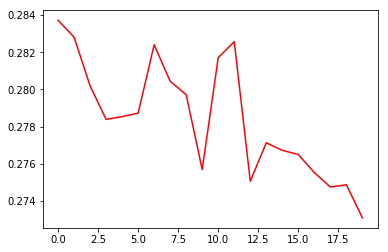

In [32]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, 
    class_weight="balance", verbose=False)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

使用決策樹做預測的準確率為0.9274939172749391

而使用類神經網路則為

Training accuracy: 0.8959662593337953

Testing accuracy: 0.8890690885501136

決策樹的準確率較高，此類問題較適合做分類預測

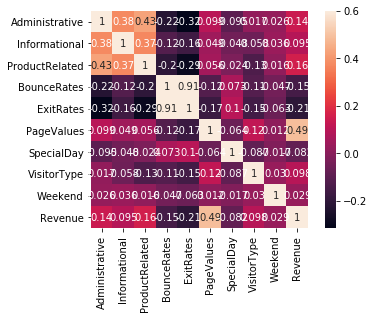

In [28]:
sns.heatmap(df.drop(columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'OperatingSystems','Browser','Region','TrafficType']).corr(), vmax=0.6, square=True, annot=True)

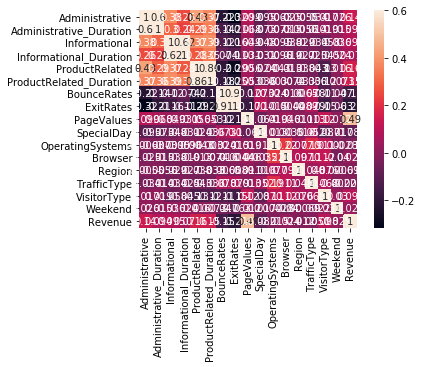

In [59]:
sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

In [60]:
new_data = df.drop(columns = ['BounceRates', 'ExitRates'])

In [61]:
new_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.0,0.0,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.0,0.0,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.0,0.0,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.0,0.0,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.0,0.0,3,3,1,4,0,1,0


In [66]:
df_test = new_data[:6165]
df_train = new_data[6165:]
y = df_train['Revenue'].values
df_train = df_train.drop('Revenue', 1)
y
dtree=DecisionTreeClassifier(max_depth=4,min_samples_split=10)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['NotRevenue','Revenue'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
dtree.feature_importances_
y_test = df_test['Revenue'].values
X_test = df_test.drop('Revenue', 1)

y_predict = dtree.predict(X_test)

y_predict
accuracy_score(y_test, y_predict)

0.9294403892944039

根據相關係數(上圖)，丟掉較不相關的欄位(['BounceRates', 'ExitRates'])

再次預測分數為0.9294403892944039



In [172]:
new_data = df[['Administrative','VisitorType', 'PageValues', 'Revenue']]

In [173]:
new_data.head()

,Administrative,VisitorType,PageValues,Revenue
0,0,0,0.0,0
1,0,0,0.0,0
2,0,0,0.0,0
3,0,0,0.0,0
4,0,0,0.0,0


In [174]:
df_test = new_data[:6165]
df_train = new_data[6165:]
y = df_train['Revenue'].values
df_train = df_train.drop('Revenue', 1)
y
dtree=DecisionTreeClassifier(max_depth=4,min_samples_split=10)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['NotRevenue','Revenue'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
dtree.feature_importances_
y_test = df_test['Revenue'].values
X_test = df_test.drop('Revenue', 1)

y_predict = dtree.predict(X_test)

y_predict
accuracy_score(y_test, y_predict)

0.9312246553122465

挑選以上參數( ['Administrative','VisitorType', 'PageValues', 'Revenue'] )在相關係數上較高

判斷的預測率為0.9312246553122465

----

原始資料預測率　0.9274939172749391

丟掉2個在相關係數上最低的欄位(['BounceRates', 'ExitRates'])預測率為 0.9294403892944039

最後是指挑選幾個相關係數上較高的欄位(['Administrative','VisitorType', 'PageValues', 'Revenue'])預測率為 0.9312246553122465